In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn import svm
import numpy as np
from sklearn.utils import shuffle
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import SGDClassifier
from plotnine import *
import xlrd
import csv

def xls2csv(xls_file, sheet_name, csv_file):

     workbook = xlrd.open_workbook(xls_file)
     worksheet = workbook.sheet_by_name(sheet_name)
     csvfile = open(csv_file, 'w')
     wr = csv.writer(csvfile, quoting=csv.QUOTE_ALL)

     for rownum in range(worksheet.nrows):
         wr.writerow(
             list(x
                  for x in worksheet.row_values(rownum)))

     csvfile.close()

/Users/Pani/Documents/my-projects/mltest/env/lib/python3.6/site-packages/matplotlib/__init__.py:1085: UserWarning: Duplicate key in file "/Users/Pani/.matplotlib/matplotlibrc", line #2
  (fname, cnt))
/Users/Pani/Documents/my-projects/mltest/env/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
xls2csv("./data/defaults.xls", "Data", "./data/defaults.csv")

In [20]:
my_data = pd.read_csv("./data/defaults.csv", header = 1)
my_data['default payment next month'] = my_data['default payment next month'].astype('int')
my_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
my_data.shape

(30000, 25)

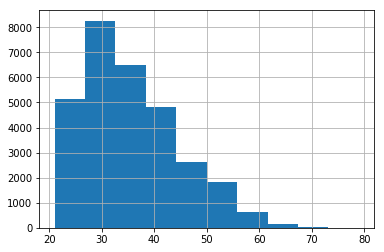

In [4]:
my_data['AGE'].hist()
plt.show()

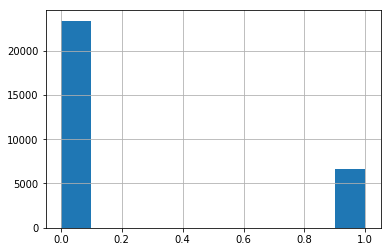

In [5]:
my_data['default payment next month'].hist()
plt.show()

In [6]:
n_train = 25000
my_data = shuffle(my_data)

pca = PCA(n_components=22, whiten=True)

train_x = my_data[my_data.columns[1:24]].iloc[:n_train]
train_y = my_data[my_data.columns[24]].iloc[:n_train]
scaler = preprocessing.StandardScaler().fit(train_x)
train_x = scaler.transform(train_x)
pca.fit(train_x, train_y)
train_x = pca.transform(train_x)

test_x = my_data[my_data.columns[1:24]].iloc[n_train:]
test_y = my_data[my_data.columns[24]].iloc[n_train:]
test_x = scaler.transform(test_x)
test_x = pca.transform(test_x)
train_x.shape

(25000, 22)

In [7]:
# model = LogisticRegression() # 0.82
# model = svm.SVC(class_weight='balanced') # 0.77
# model = GradientBoostingClassifier(learning_rate=0.005, n_estimators=2000, max_leaf_nodes=20,
#                                    subsample=0.65, verbose=1) # 0.83
model = SGDClassifier(alpha=0.01, loss="hinge", penalty="l2", shuffle=True)
print(model)
model.fit(train_x, train_y)
predict_y = model.predict(test_x)
predict_train_y = model.predict(train_x)
{'train': np.mean(predict_train_y == train_y)
,'test': np.mean(predict_y == test_y)
}

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)


{'test': 0.81299999999999994, 'train': 0.80747999999999998}

In [8]:
coef_df = pd.DataFrame({"Feature": my_data.columns[1:24],"Coefficient":pca.inverse_transform(model.coef_)[0]})

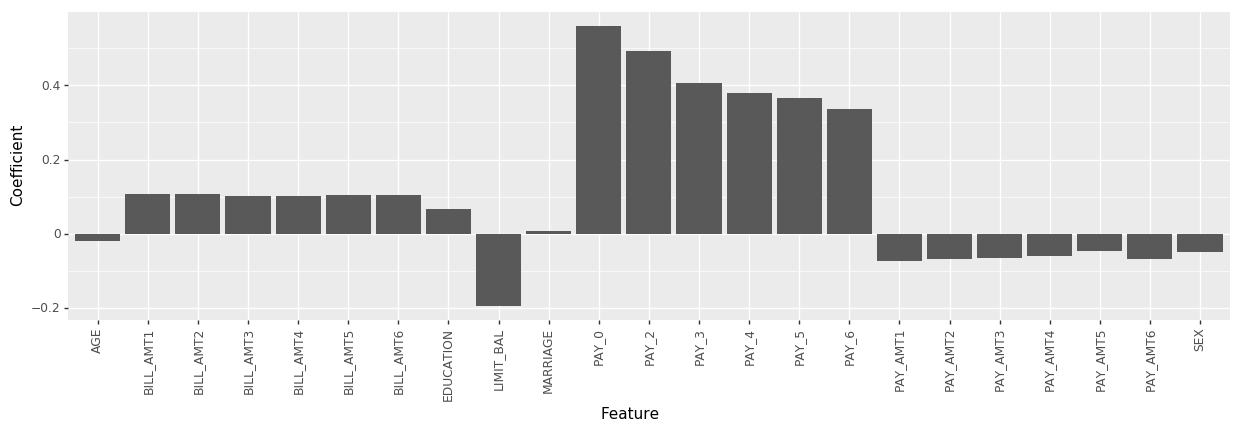

<ggplot: (-9223372036576313333)>

In [27]:
(ggplot(coef_df, aes(x ="Feature", y="Coefficient")) 
 + geom_bar(stat = "identity") 
 + theme(axis_text_x = element_text(rotation=90),
         figure_size=(15,4)))

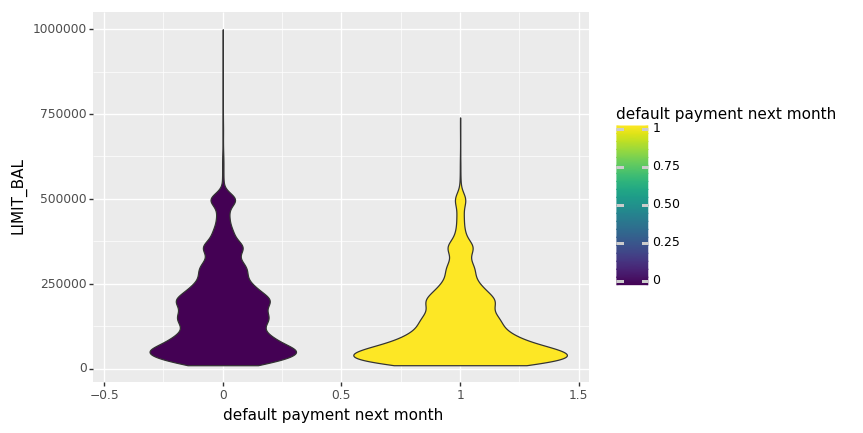

<ggplot: (-9223372036573791207)>

In [24]:
(ggplot(my_data, aes(x = "default payment next month", y= "LIMIT_BAL",
                     group="default payment next month",
                     fill="default payment next month"))
      + geom_violin()
)

/Users/Pani/Documents/my-projects/mltest/env/lib/python3.6/site-packages/plotnine/layer.py:458: UserWarning: geom_bar : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


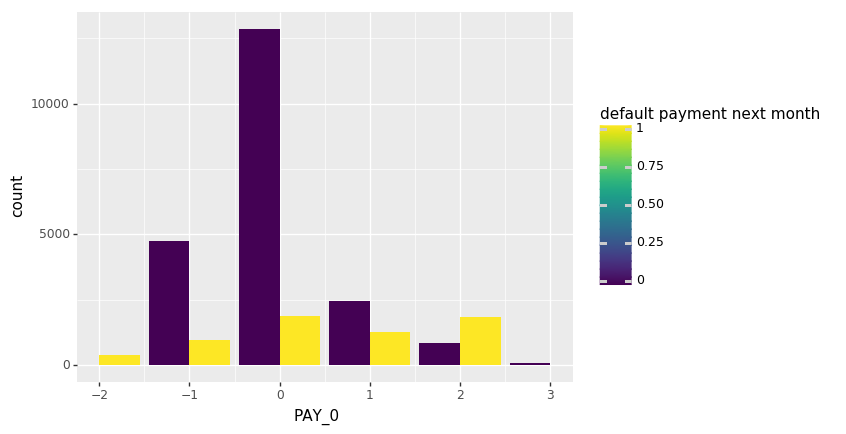

<ggplot: (-9223372036575367210)>

In [22]:
(ggplot(my_data, aes( x= "PAY_0",
                      group="default payment next month",
                     fill="default payment next month"))
    + geom_bar(position='dodge', stat='count')
    + xlim((-2,3))
)